Важно подписывать у графиков оси, не забывать названия и указывать легенду там, где это нужно. Конечно, так лучше делать всегда, но понятно, что если вы делаете какое-то исследование (в особенности для себя), часто мы позволяем себе опускать такие важные части оформления графиков. Тем не менее если речь идет о статье или презентации, то грамотное оформление графика обязательно.

### Задача 1.

**Note:** задача про изменение глобальных настроек.

В этой задаче вам нужно изменить некоторые глобальные настройки через `rcParams` ([здесь](https://matplotlib.org/stable/users/explain/customizing.html#the-default-matplotlibrc-file) список названий настроек, например, размер фигуры можно задать так: `mlp.rcParams["figure.figsize"] = (16, 9)`). Начать можно со шрифта - выберите свой (отличный от дефолтного!).

В случае, если вы будете использовать `sns` (либо как основной, либо как дополнительный), то в этой же ячейке поменяйте и его настройки, но помните, что они могут перезаписывать друг друга (`sns` - обертка над `mpl`)

Возможно задачу стоит постепенно выполнять по мере продвижения по ноутбуку, возвращаясь к этой ячейке, но проверяйте, что уже сделанные визуализации "не поплыли".

In [1]:
import matplotlib as mpl

# ваш код тут
mpl.rcParams["font.style"] = "italic"

### Подготовка

Это будут два датасета о качестве красного и белого вина. Возможно в последующих задачах вам будет удобнее переходить к нампаевским массивам.

In [2]:
#####################################################
##### Пока можно особо не вникать что происходит ниже
##### но обратите внимание на категории
#####################################################

import pandas as pd
import numpy as np

# можно читать файлы сразу по ссылке в интернете
white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_wine = pd.read_csv(white, sep=';')
red_wine = pd.read_csv(red, sep=';')

# будем хранить тип вина как атрибут
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Сделаем оценку качества вина менее гранулярной
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
                                                          if value <= 5 else 'medium'
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
                                                              if value <= 5 else 'medium'
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
                                             categories=['low', 'medium', 'high'])

# Соединим наборы данных по красному и белому вину
wines = pd.concat([red_wine, white_wine])

# Просто перемешаем данные
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white,low
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white,medium
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white,low
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white,low


### Задача 2

Постройте гистограммы плотности красного и белого. Желательно на одном графике, но гистограммы должны быть отличимы. Вам может помочь прозрачность и их покраска в разные цвета.

<Axes: >

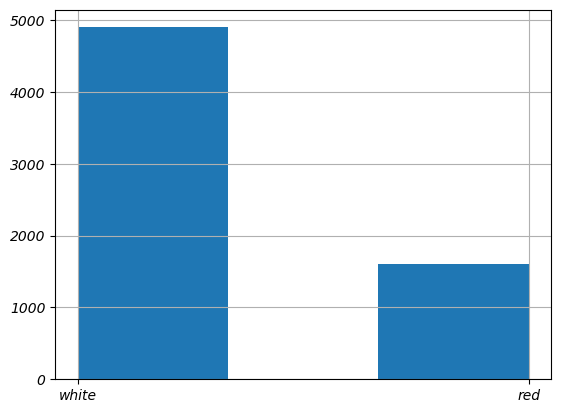

In [20]:
# ваш код тут
colors = ["red", "yellow"]

wines["wine_type"].hist(bins=3)

### Задача 3

Постройте столбчатую диаграмму столбца `quality_label` (кол-во вина каждого качества)

<BarContainer object of 3 artists>

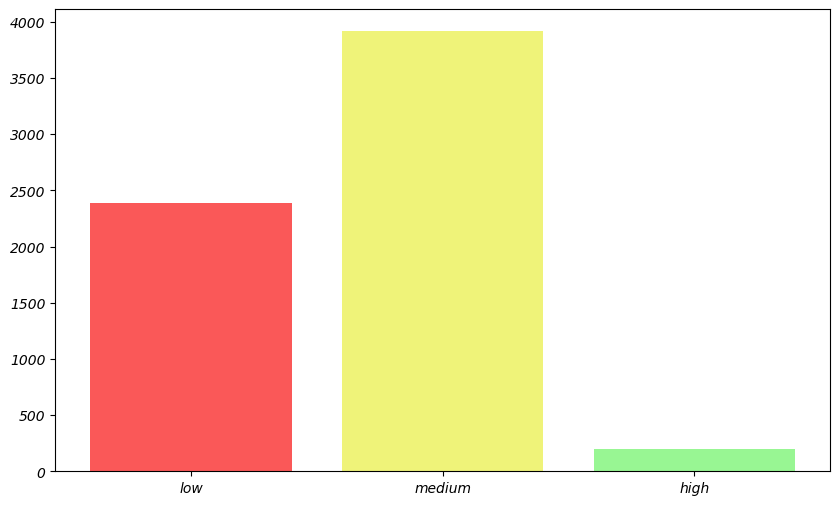

In [21]:
# ваш код тут
from matplotlib import pyplot as plt

quality_counts = wines['quality_label'].value_counts().sort_index()
fig = plt.figure(figsize=(10, 6))

colors = ["#FA5858", "#EFF379", "#98F693"]

plt.bar(quality_counts.index, quality_counts.values, color=colors, )



### Задача 4

Постройте на сетке размера 2 на 2 (сетку создайте удобным для вас способом) гистограммы признаков `fixed acidity`,	`volatile acidity`,	`citric acid`,	`residual sugar` в разбиении по белому и красному вину.

Не забудьте про оформление. Гистограммы должны быть различимы, чтобы их можно было прочитать, например, можно воспользоваться прозрачностью или смещением (как в примере следующей задачи).

In [ ]:
# ваш код тут

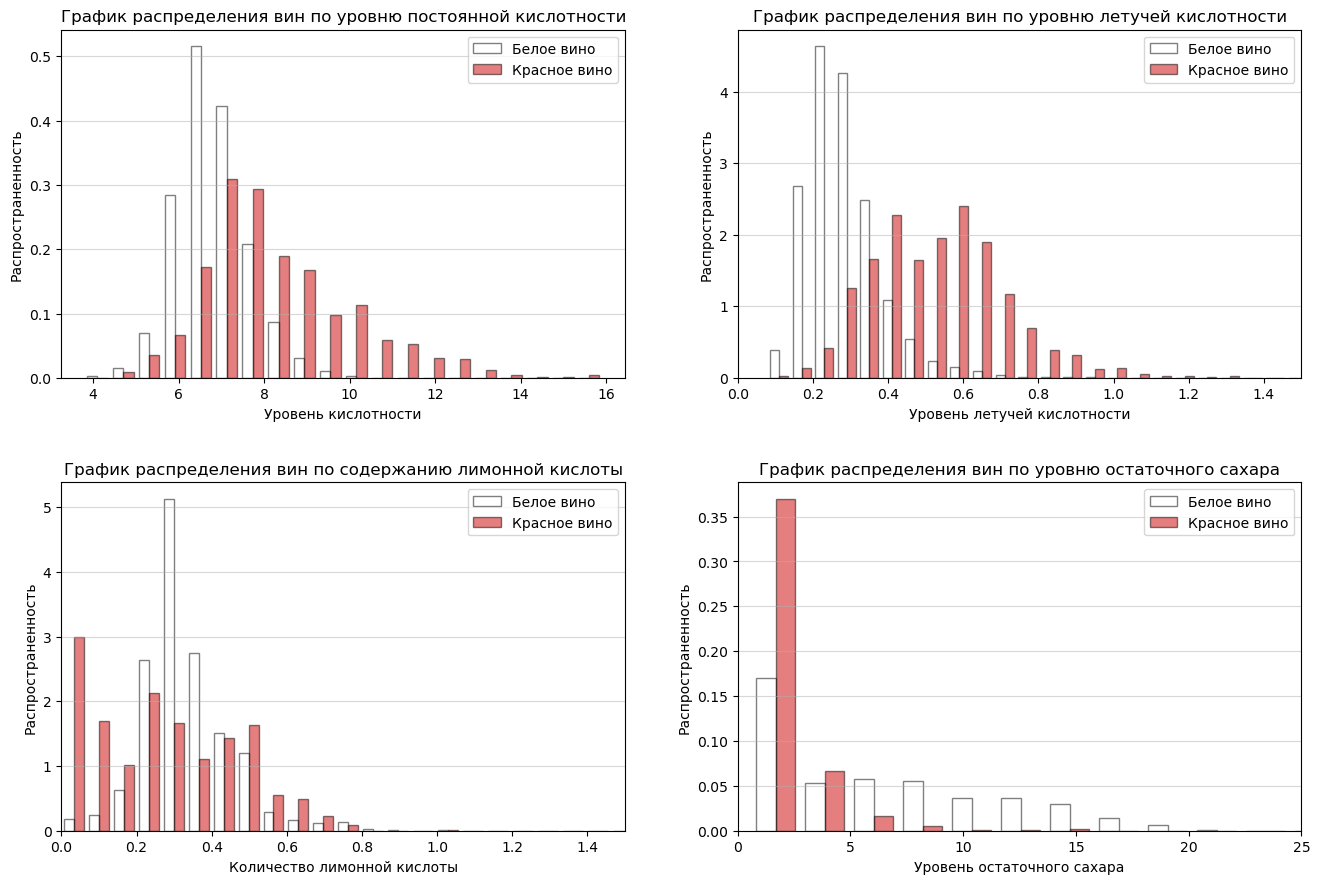

In [ ]:
# пример

### Задача 5

Отобразите scatter plot, на котором будет отражена информация по 4-м признакам: fixed acidiy, alcohol, residual sugar и wine_type (переводы в заголовке примера ниже).

График двумерный (т.е в плоскости), но вы можете пользоваться чем-то из этого списка. Смотрите сами, что будет более уместным:


*   Размером точек
*   Цветом точек
*   Цветом границ точек
*   Формой точки (круг, крест, квадрат...)
*   и т.д.

In [ ]:
# ваш код тут

Ниже приведен пример "хорошего" (на котором читаются все 4 признака) графика.

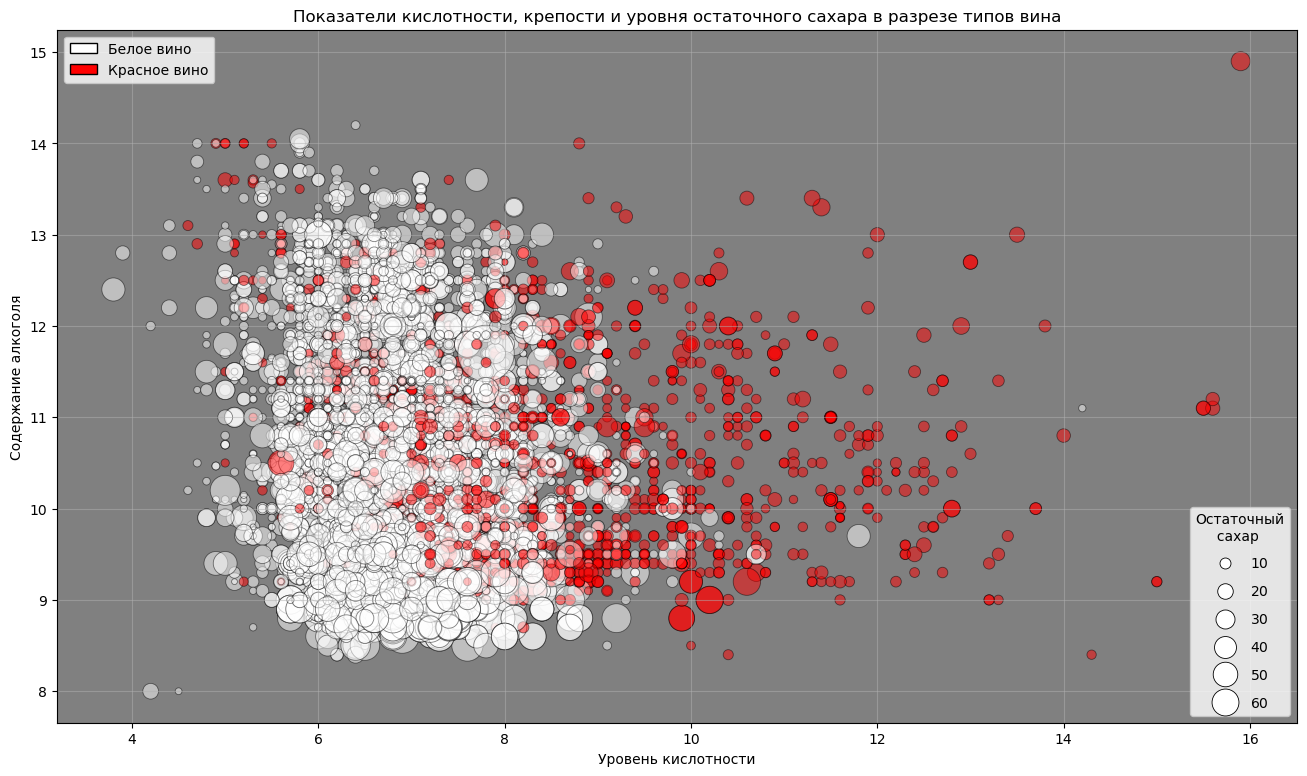

In [ ]:
# пример